# Part I - (Dataset Exploration Title)
## by (Lilian Some)

## Introduction
> Ford GoBike System Data data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.




## Preliminary Wrangling


In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import os
%matplotlib inline


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in dataset 
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')


In [3]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
#Check the Data Type in Pandas DataFrame
fordgobike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:

fordgobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# Count the number of duplicates
(fordgobike.duplicated()).sum()


0

In [8]:
#find   number of bikes in dataset
fordgobike.bike_id.nunique()

4646

In [9]:
bike=fordgobike.copy()

In [10]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [11]:
bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### Data  Assessmen Result¶



All datasets are downloaded programatically and appended. The folllowing quality Issues were noted



Update start_time and end_time to date-time format
Convert the start_station_id and end_station_id int int64
Update member_birth_year as int64
Replace missing values for member_gender column as ‘Other’
* Chage start_time and end_time columns  from object dtype to datetime
* Change start_station_id and end_station_id columns  to int64 dtype
* Convert start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude columns in float64 dtype
* bike_id column in int64 dtype
* user_type in object dtype

In [12]:
# Define: Change columns dtype based on it's value

# Code
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        
        'start_station_id': 'object',
        'end_station_id': 'object',
        
        'start_station_latitude': 'object',
        'start_station_longitude':  'object',
        'end_station_latitude':  'object',
        'end_station_longitude':  'object',
        
        'bike_id': 'object',
        'user_type': 'category'}

bike = bike.astype(dtype)

# Test
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null object
start_station_longitude    183412 non-null object
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null object
end_station_longitude      183412 non-null object
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(11

In [13]:
# Create new columns from start_time  and end_time colums
bike['start_hour'] = bike.start_time.dt.hour
bike['end_hour'] = bike.end_time.dt.hour

bike['start_month'] = bike.start_time.dt.month
bike['end_month']= bike.end_time.dt.month

bike['end_weekday'] = bike.end_time.dt.weekday
bike['start_weekday'] = bike.start_time.dt.weekday


In [14]:
# Test
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null object
start_station_longitude    183412 non-null object
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null object
end_station_longitude      183412 non-null object
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
start_hour                 183412 non-null int64
end_hour              

In [15]:
bike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour,start_month,end_month,end_weekday,start_weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.7896,-122.401,13,Commercial St at Montgomery St,37.7942,...,Customer,1984.0,Male,No,17,8,2,3,4,3
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.7915,-122.391,81,Berry St at 4th St,37.7759,...,Customer,NaN,NaN,No,18,6,2,3,4,3
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.7693,-122.427,3,Powell St BART Station (Market St at 4th St),37.7864,...,Customer,1972.0,Male,No,12,5,2,3,4,3
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.7748,-122.447,70,Central Ave at Fell St,37.7733,...,Subscriber,1989.0,Other,No,17,4,2,3,4,3
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.8046,-122.272,222,10th Ave at E 15th St,37.7927,...,Subscriber,1974.0,Male,Yes,23,0,2,3,4,3
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.7704,-122.391,323,Broadway at Kearny,37.798,...,Subscriber,1959.0,Male,No,23,0,2,3,4,3
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.3173,-121.885,312,San Jose Diridon Station,37.3297,...,Subscriber,1983.0,Female,No,23,0,2,3,4,3
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,37.7954,-122.405,127,Valencia St at 21st St,37.7567,...,Subscriber,1989.0,Male,No,23,0,2,3,4,3
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,37.7954,-122.405,127,Valencia St at 21st St,37.7567,...,Subscriber,1988.0,Other,No,23,0,2,3,4,3
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,Post St at Kearny St,37.789,-122.403,121,Mission Playground,37.7592,...,Subscriber,1992.0,Male,No,23,0,2,3,4,3


### What is the structure of your dataset?

> The bike dataset consists of 183412 rows × 23 columns. In the other words, this dataset has 183412 trips each with 22 variables.There are 4646 unique bikes. Most varuiables are numeric in nature (Float64(7), Int64(2), Object(7))

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in this dataset is how various variables affect bike trips across the bay area  and how customer characterisitics( age, gender) affect biking outcomes.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> From the main feature above, I thinks the feature that will help our investigation are the member gender   and  birth_date 

### Indepth Understanding
 Ford GoBike is focused in the bay area with many people already subscribed to this service. There are others who would like to try this out for once before availing the service.

In a crowded area like Bay Area, people often use such bike services to commute short distances within the city on a regular basis. Thus, to understand the true use of such service, it is very important to evaluate some basic questions.

These are the different questions that we would like to answer:
1.	How is the duration of the trip in seconds?
2.	How many types of users are in this dataset?
3.	What is the Gender Distribution across bikers?
4.	What is the Age Distribution?
5.	What is the daily ride distribution?
6.	What is the Monthly ride distribution?
7.	What are bike Service Popular Times?
8.	How long is the duration of the trip for each gender in minutes? 
9.	Distribution between age and trip duration?
10.	How Trip Duration Varies across Genders
11.	What is the Relationship between Trip Duration and User Type?
12.	What is the Relationship between Age, trip duration and Gender?
13.	What is the Correlation between each variable in the dataset?

## Univariate Exploration



### How is the duriation of the trip in seconds?

1.How is the duriation of the trip in seconds?
2.How many types of users are in this dataset?

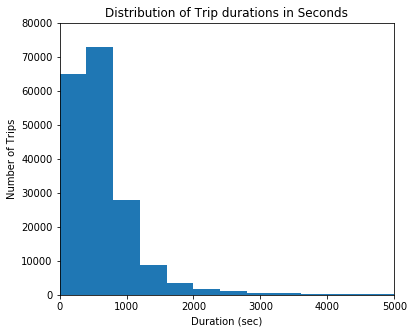

In [16]:
bins = np.arange(0, bike['duration_sec'].max()+400, 400)

plt.figure(figsize=[6, 5])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip durations in Seconds')
plt.ylabel('Number of Trips')
plt.xlabel('Duration (sec)')
plt.axis([0, 5000, 0, 80000])
plt.show()

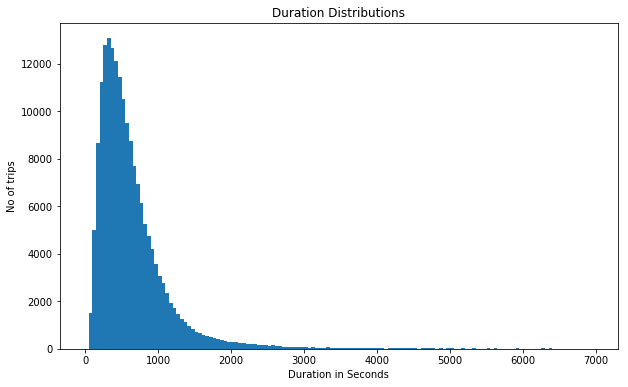

In [41]:
plt.figure(figsize=(10,6))
bins = np.arange(0, 7000, 50)
plt.hist(bike.duration_sec, bins=bins)
plt.title('Duration Distributions');
plt.ylabel('No of trips')
plt.xlabel('Duration in Seconds')
plt.show()

Observation:The graph above shows that the majority of the users trip for less than 1500 seconds ( which is 25 mins)

### How many types of users are in this dataset?

In [18]:
# There is ony two type of user
bike.user_type.unique()

[Customer, Subscriber]
Categories (2, object): [Customer, Subscriber]

In [42]:
bike.groupby('user_type').describe()

age                                                       \
               count       mean        std   min   25%   50%   75%    max   
user_type                                                                   
Customer     16631.0  33.638927   9.478858  18.0  27.0  32.0  38.0  141.0   
Subscriber  158516.0  34.251754  10.179569  18.0  27.0  32.0  39.0  119.0   

           duration_sec              ...  start_month      start_weekday  \
                  count         mean ...          75%  max         count   
user_type                            ...                                   
Customer        19868.0  1432.465019 ...          2.0  2.0       19868.0   
Subscriber     163544.0   640.263678 ...          2.0  2.0      163544.0   

                                                         
                mean       std  min  25%  50%  75%  max  
user_type                                                
Customer    3.065180  1.975393  0.0  1.0  3.0  5.0  6.0  
Subscriber  2.579575  1.787170  0.0  1.0  3.0  4.0  6.0  

[2 rows x 72 columns]

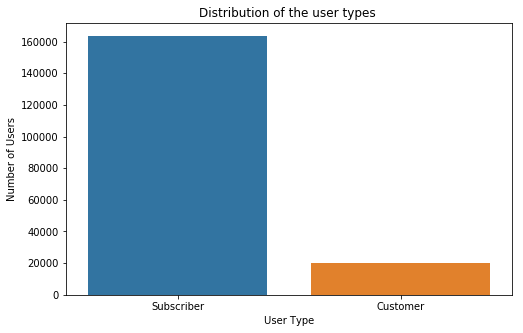

In [20]:
# plot a bar chart
plt.figure(figsize=[8, 5])
user_category = bike['user_type'].value_counts().index
sb.countplot(data = bike, x = 'user_type', order = user_category)
plt.title('Distribution of the user types ')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

Observation: There were over 160,000 subscribing users and 20,000 customers.

### What is the Gender Distribution across bikers ?

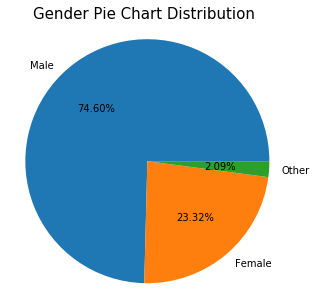

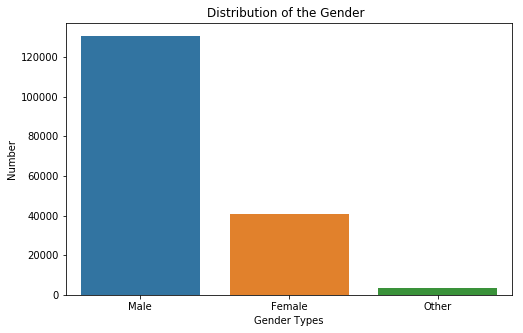

In [21]:
# Show user type by it's percentage

plt.figure(figsize=(8,5))
sorted_counts = bike['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index,
         autopct='%1.2f%%');
plt.axis('square')
plt.title('Gender Pie Chart Distribution ', fontsize=15);


# plot a bar chart
plt.figure(figsize=[8, 5])
user_category = bike['member_gender'].value_counts().index
sb.countplot(data = bike, x = 'member_gender', order = user_category)
plt.title('Distribution of the Gender  ')
plt.xlabel('Gender Types')
plt.ylabel('Number')
plt.show()

Observation:
* There are more male bikers at 74.6%  than women at 23,32% and lasty 2.09% identifiy as other Gender.
* Over 120,000 males used the service while about 40000 females used the service. The other gender is a small number

### What is the Age Distribution?

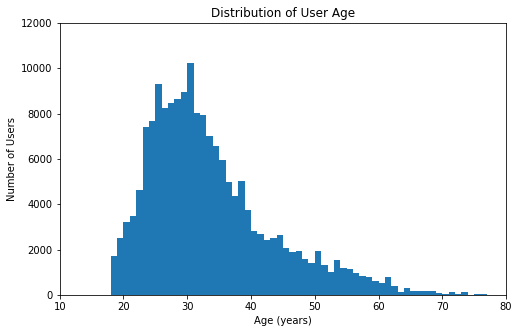

In [22]:
# Plotting age distribution derived from member's birth year.

bins = np.arange(0, bike['member_birth_year'].astype(float).max()+1, 1)

plt.figure(figsize=[8, 5])
plt.hist(data = bike.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users')
plt.show()

Observation: All users are aged above 15 years 
Most users are between the age 25 and 40. There is a steadly decline in usage from ages of  35 and up.

Therechart showns no outlier  in the age values , hennce lets plot a boxplot

Observation: There is an outlier value of 140 in age

### What is the daily ride distribution?

In [23]:
# labels to use in plots
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

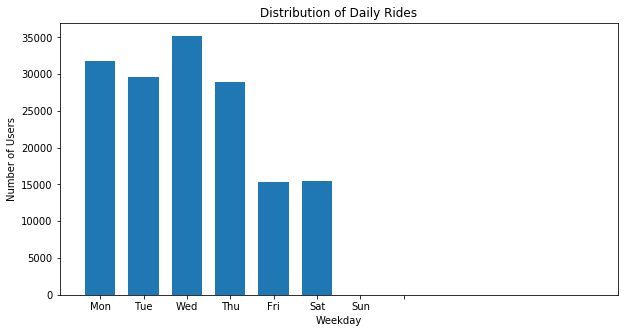

In [24]:
# plot a histogram with gaps between bars
bin_edges = np.arange(0.5, 12.5 + 1, 1)
plt.figure(figsize=[10,5])
plt.hist(data = bike, x = 'start_weekday', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(1, 8 + 1, 1), weekday_labels)
plt.xlabel('start_weekday')
plt.title('Distribution of Daily Rides')
plt.xlabel('Weekday')
plt.ylabel('Number of Users')
plt.show()

Observation: Wednesday was the busiest day of the week  with 350000 users  and friday and sataurday had the least number of rides . There were no rides on Sunday

### What is the Monthly ride distribution?

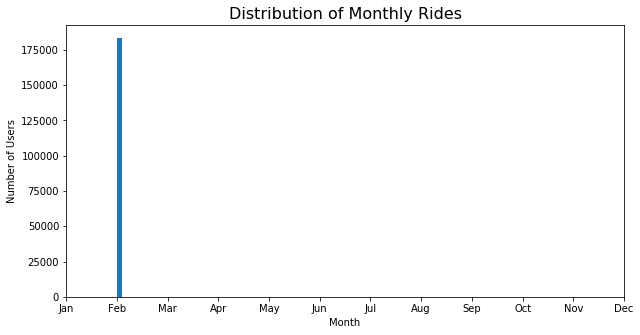

In [25]:
# plot a histogram with gaps between bars

plt.figure(figsize=[10,5])
plt.hist(data = bike, x = 'end_month')
plt.xticks(np.arange(1, 12 + 1, 1), month_labels)
plt.title('Distribution of Monthly Rides', fontsize = 16)
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.show()

Observation: This dataset captures the  bike data in the month of February alone


### What are bike Service Popular Times

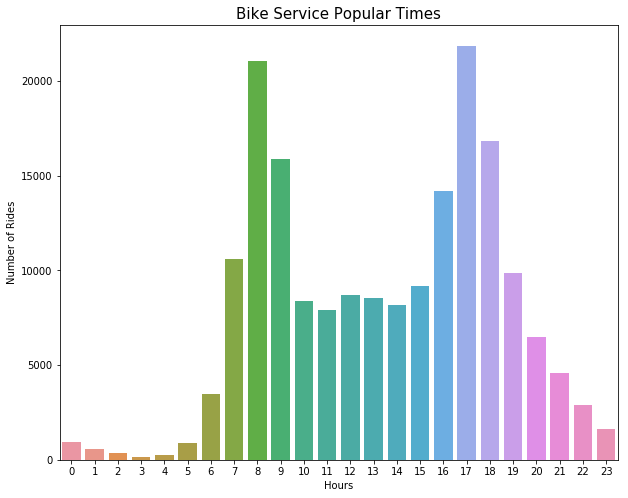

In [26]:
hour_order = np.arange(0,24)
plt.figure(figsize=(10,8))
plt.title('Bike Service Popular Times', fontsize=15)
ax = sb.countplot(data=bike, x='start_hour', order=hour_order)
plt.ylabel('Number of Rides')
plt.xlabel('Hours');

Observation: 
* The peak time for usage is moning hours ( 8.00 hrs & 9.00 hours) and evening (17.00 hours & 18.00 hrs). This can be to rush hours where people leave for work and come back later in the evening
* The lowest usage time is  between 0.00hrs to 5.00hrs . This could mean that these are night hours hence low human activity.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the trips were less than 30 minutes
> Age distribution is left Skewed  as most users age are 25 - 40
> Most users are subscribers, not Customers and Males

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We got age outliers for for more than 100 .

## Bivariate Exploration


###  How long is the duration of the trip for each gender in minutes? 

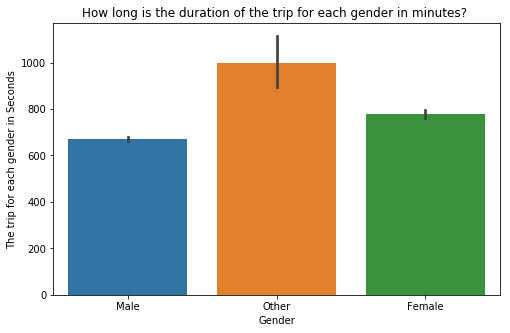

In [55]:
plt.figure(figsize = (8,5))
sb.barplot(data = bike, x = "member_gender", y = "duration_sec")
plt.xlabel('Gender')
plt.ylabel('The trip for each gender in Seconds')
plt.title("How long is the duration of the trip for each gender in minutes? ")
plt.show()

Observation : Male users have the shortest trip, followed by the female  

### Distribution between age and trip duration¶

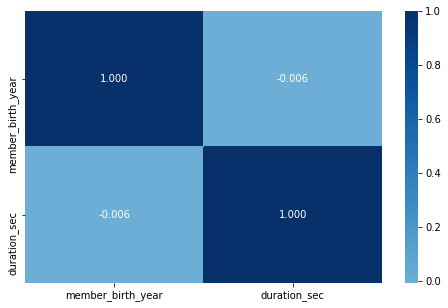

In [28]:
#numeric_vars = ['duration_sec', 'member_birth_year']
nvars = ['member_birth_year', 'member_gender', 'user_type', 'duration_sec']
# heatmap to show correlations between variables
plt.figure(figsize = [8, 5])
sb.heatmap(bike[nvars].corr(), annot = True, fmt = '.3f',cmap = 'Blues', center = 0)
plt.show()

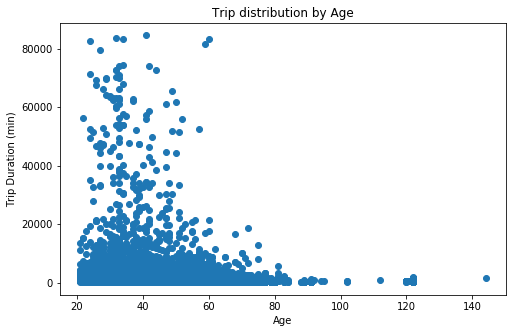

In [47]:
#Distribution between age and trip duration
def age_trip_dist():
    from datetime import datetime
    bike['age'] = datetime.now().year - bike.member_birth_year
    plt.figure(figsize=[8,5])
    plt.scatter(data = bike, x = 'age', y ='duration_sec', alpha= None)
    plt.title('Trip distribution by Age')
    plt.xlabel('Age')
    plt.ylabel('Trip Duration (min)')

age_trip_dist()

Observation: 
>As most of the durations are below 60000 and age is below 80.
>However, it actually make sense that in this dataset, the major population of age is between 30 and 40 years old. We have less samples in the older population.

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


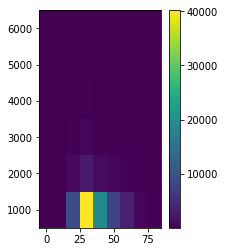

In [44]:
plt.subplot(1, 2, 2)
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d((2019 - bike['member_birth_year']), bike['duration_sec'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);

Observation:By looking at these olys we can say that most frequent users of bikes are aged between 20 and 45. Higher duration is clocked by younger members.

### How Trip Duration Varies across Genders?¶

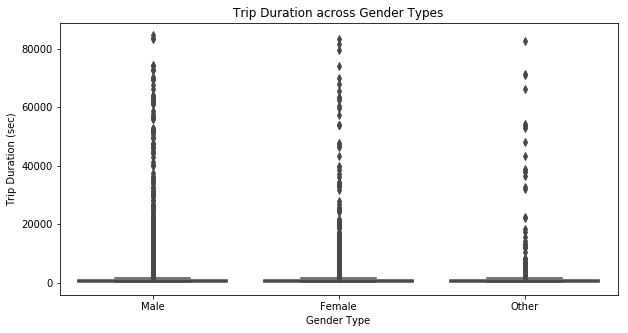

In [31]:
plt.figure(figsize = [10, 5])
sb.boxplot(x='member_gender', y='duration_sec', data = bike, palette = 'Set1', order=['Male', 'Female', 'Other'])
plt.title('Trip Duration across Gender Types')
plt.xlabel('Gender Type')
plt.ylabel('Trip Duration (sec)')
plt.show()

Observation: The boxplot does show that female and other gender have a higher trip duration than males.

### Trip Duration and User Type

In [32]:
# customer and subscriber from user_type
customer_user = bike['user_type']=='Customer'
subscriber_user = bike['user_type']=='Subscriber'

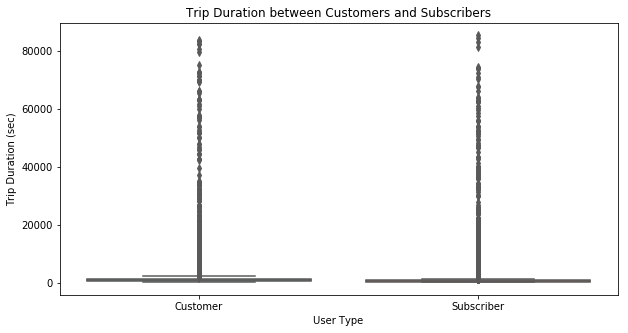

In [33]:
plt.figure(figsize = [10, 5])
sb.boxplot(x='user_type', y='duration_sec', data = bike, palette ='Set2')
plt.title('Trip Duration between Customers and Subscribers')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (sec)')
plt.show()

In [34]:
bike[customer_user].duration_sec.mean()

1432.4650191262331

In [35]:
bike[subscriber_user].duration_sec.mean()

640.26367827618253

Observation :The customers are spending more time on a bike trip than subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationships observed between age and the length of the trip was inversely correlated. The trip duration decreased with an increase in age not surprisingly.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> When looking at the relationship between gender members and trip duration I was surprised to find that male had the lowest trip duration.
> I also found that among users, an actual customer is spending more time on a bike trip than subscribers. I

## Multivariate Exploration



The main thing I want to explore in this part of the analysis is how the two categorical measures gender and user type play into the relationship between trip duration and age

### What is the Relationship between Age, trip duration and Gender?

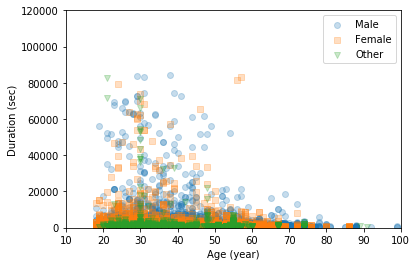

In [36]:
gender_markers = [['Male', 'o'],['Female', 's'],['Other', 'v']]

for gender, marker in gender_markers:
    bike_gender = bike[bike['member_gender'] == gender]
    plt.scatter((2019 - bike_gender['member_birth_year']), bike_gender['duration_sec'], marker = marker, alpha=0.25)
plt.legend(['Male','Female','Other'])
plt.axis([10, 100, -100, 120000 ])
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.show()

This graph isn't very easy to read, lets split it into three genders

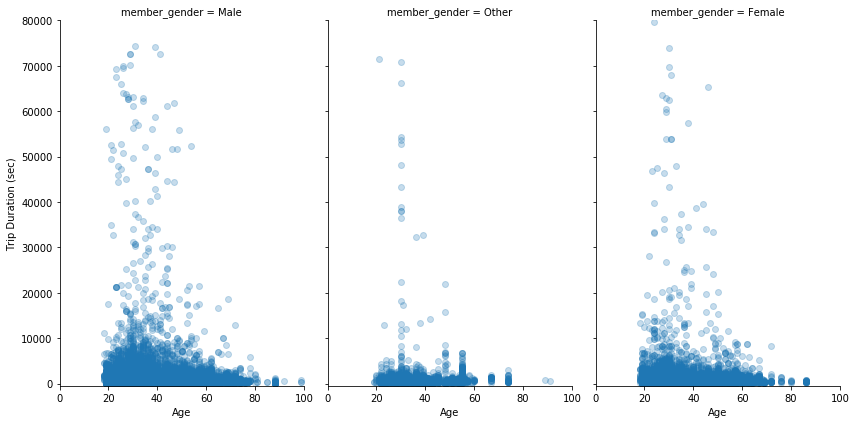

In [37]:
bike['age'] = (2019 - bike['member_birth_year'])
genders = sb.FacetGrid(data = bike, col = 'member_gender', col_wrap = 4, size = 6,
                aspect = 0.65, xlim = [0, 100], ylim = [-500, 80000])
genders.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
genders.set_xlabels('Age')
genders.set_ylabels('Trip Duration (sec)')
plt.show()



Observation:  All genders show similar trends in age and trip duration 
There is a sharp decline in duration in people above 80 years across all genders 


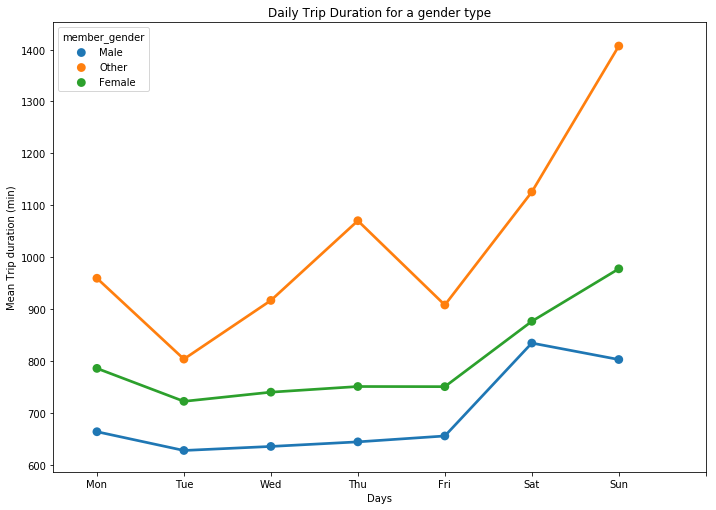

In [51]:
def age_gen_distr():
    plt.figure(figsize=[11.69, 8.27])
    sb.pointplot(data = bike, x = 'start_weekday', y = 'duration_sec', hue = 'member_gender', ci=None)
    plt.title('Daily Trip Duration for a gender type')
    plt.ylabel('Mean Trip duration (min)')
    plt.xlabel('Days')
    plt.xticks(np.arange(0, 7 + 1, 1),weekday_labels)
age_gen_distr()

Observation:   In all the three genders the time duraion  across the week is similar. 

###  What is the Correlation between each variable in the dataset?


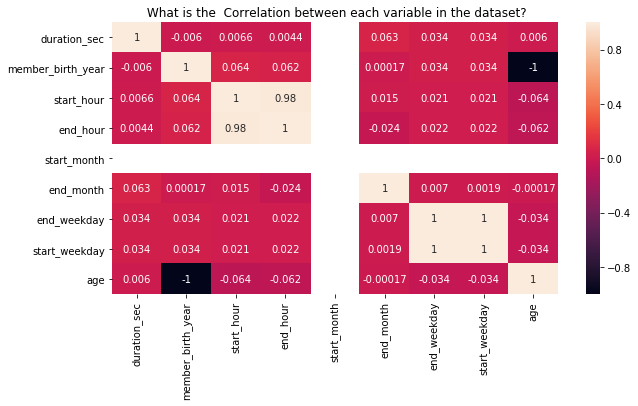

In [39]:
plt.figure(figsize = (10,5) )
sb.heatmap(bike.corr(), annot = True)
plt.title(" What is the  Correlation between each variable in the dataset?")
#plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Observation: 
* There is no correlation for any variable with start month 
* There is a strong Correlation between start_hour and  end hour  
* There is a weak correlation between all other variables 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Not surprising the trip duration start trending up on the weekends from Thursdays to Saturdays. Males still have the shortest bike trip.
### Were there any interesting or surprising interactions between features?

> There is no correlation for any variable with start_month

## Conclusions

* The dataset is just for the month of February 
* Most trips were taken on Thursdays and Tuesdays
* About 90% of the trips were taken by subscribers
* The peak hours are between 8.am and 9.am in the morning and 5-6pm in the evening. 
* The number of trips gradually decreases at nighttime. Also, there are more trips during the weekdays and less trips during the weekends. 
* Also, there are more subscribers than customers. For the gender groups, the number of trips in male riders is more than the number of trips in females. 
* Most of riders are between 25 to 40 years.
* Females spend more duration than males. Most of the durations are below 60000 secs and age distributions below 80 years. 

* The customers are spending more time on a bike trip than subscribers. 
* All genders show similar trends in age and trip duration. There is a sharp decline in duration in people above 80 years across all genders
